In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
figpath = os.path.join(os.path.expanduser('~'), 'Data/Figures_IBL')

## same plot but with ONE

In [2]:
## REPEAT WITH ONE
from oneibl.one import ONE
one = ONE()
trajs = one.alyx.rest('trajectories', 'list')
traj = pd.DataFrame(list(trajs))

# get the subject info out of the 'session' column
for kix, k in enumerate(traj.session[0].keys()):
    tmp_var = []
    for id, c in traj.iterrows():
        if k in c['session'].keys():
            tmp = c['session'][k]
        else:
            tmp = np.nan
        tmp_var.append(tmp)
        # also add the date
    traj[k] = tmp_var
traj

Connected to https://alyx.internationalbrainlab.org as anneu


,id,probe_insertion,x,y,z,depth,theta,phi,roll,provenance,session,probe_name,coordinate_system,subject,start_time,number,lab,task_protocol
0,c47ecaa5-7b14-4d9a-8dc6-fe527838c63a,f384b25e-d604-452e-aecf-526ee618229c,684.700000,-3272.100000,-458.5,5749.000000,17.000000,0.000000,0.0,Micro-manipulator,"{'subject': 'ibl_witten_14', 'start_time': '20...",probe00,Needles-Allen,ibl_witten_14,2019-12-05T18:40:55,1.0,wittenlab,_iblrig_tasks_ephysChoiceWorld6.2.3
1,3e7ae7c0-fe8b-487c-9354-036236fa1010,6d3b68e0-3efd-4b03-b747-16e44118a0a9,953.700000,-1533.400000,-211.1,6683.400000,17.000000,0.000000,0.0,Micro-manipulator,"{'subject': 'CSH_ZAD_001', 'start_time': '2020...",probe00,Needles-Allen,CSH_ZAD_001,2020-01-16T15:53:21.500926,1.0,zadorlab,_iblrig_tasks_ephysChoiceWorld6.2.5
2,d33baf74-263c-4b37-a0d0-b79dcb80a764,2ce1d485-ebce-41a2-a5ce-aa109d5a13a3,-1282.000000,2501.000000,-948.0,4000.000000,15.000000,180.000000,90.0,Micro-manipulator,"{'subject': 'ZM_2240', 'start_time': '2020-01-...",probe00,Needles-Allen,ZM_2240,2020-01-21T10:44:49,1.0,mainenlab,_iblrig_tasks_ephysChoiceWorld6.2.5
3,90d1e82c-c96f-496c-ad4e-ee3f02067f25,b40d8c65-7ee8-4069-8b64-1a3f7907742f,-1300.000000,-3000.000000,92.0,4000.000000,15.000000,180.000000,0.0,Micro-manipulator,"{'subject': 'DY_010', 'start_time': '2020-01-2...",probe00,Needles-Allen,DY_010,2020-01-23T14:35:49.539303,1.0,danlab,_iblrig_tasks_ephysChoiceWorld6.2.5
4,110de25e-4eed-4ec8-804a-b77d17635c3a,dc118101-c270-4bc3-b9ec-10f99999f558,500.000000,-800.000000,0.0,3500.000000,10.000000,180.000000,0.0,Micro-manipulator,"{'subject': 'SH012', 'start_time': '2020-01-29...",probe00,Needles-Allen,SH012,2020-01-29T11:16:04,1.0,angelakilab,_iblrig_tasks_ephysChoiceWorld6.2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,74bae29c-f614-4abe-8066-c4d83d7da143,154b7adb-c947-4b65-a0ff-c0bb707e1564,-2886.441418,-5493.316308,-1393.0,3924.159411,13.780314,46.139141,0.0,Histology track,"{'subject': 'CSHL053', 'start_time': '2020-02-...",probe01,IBL-Allen,CSHL053,2020-02-03T13:49:31,3.0,churchlandlab,_iblrig_tasks_ephysChoiceWorld6.2.5
1008,57fd2325-67f4-4d45-9907-29e77d3043d7,7f3dddf8-637f-47bb-a7b7-e303277b2107,-2138.379144,-2919.325986,-68.0,4732.803000,11.488679,-164.761423,0.0,Histology track,"{'subject': 'CSHL054', 'start_time': '2020-02-...",probe00,IBL-Allen,CSHL054,2020-02-12T15:29:10,1.0,churchlandlab,_iblrig_tasks_ephysChoiceWorld6.2.5
1009,0cbeae00-e229-4b7d-bdcc-1b0569d7e0c3,f9656eee-141c-453d-a016-4aba68f674dc,-3175.373503,-1974.039425,-493.0,5945.877433,6.876106,-40.153266,0.0,Histology track,"{'subject': 'CSHL055', 'start_time': '2020-02-...",probe01,IBL-Allen,CSHL055,2020-02-17T14:07:14,1.0,churchlandlab,_iblrig_tasks_ephysChoiceWorld6.2.5
1010,cf7c17b0-0dda-4c05-b155-addb66a00f5f,e1426b53-5350-4b64-854e-9ca56b692372,-2630.308369,-3150.000000,-243.0,4377.269410,11.964529,180.000000,0.0,Histology track,"{'subject': 'CSHL_020', 'start_time': '2019-12...",probe00,IBL-Allen,CSHL_020,2019-12-05T14:04:54,2.0,churchlandlab,_iblrig_tasks_ephys_certification6.2.3


In [3]:
# traj['theta_name'] = traj['theta'].map({10:'10deg', 15:'15deg', 17:'17deg'})
# traj['probe_name'] = traj.probe_name + ', ' + traj['theta'].round().apply(str)
traj['session_date'] = traj['start_time'].str[0:10] + ', ' + traj.probe_name
traj = traj.sort_values(by=['subject'])
print(traj.columns)

Index(['id', 'probe_insertion', 'x', 'y', 'z', 'depth', 'theta', 'phi', 'roll',
       'provenance', 'session', 'probe_name', 'coordinate_system', 'subject',
       'start_time', 'number', 'lab', 'task_protocol', 'session_date'],
      dtype='object')


## show targeted and histology AP coords side by side

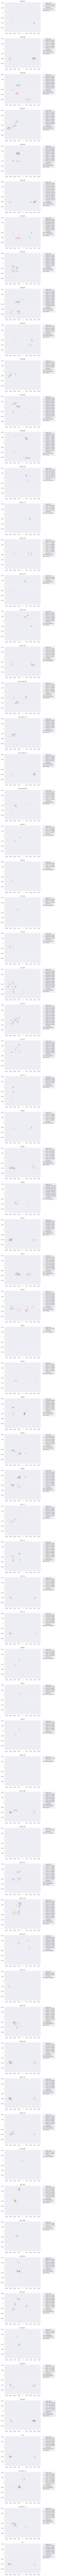

In [10]:
sns.set(style="darkgrid", context="paper")
markers = ["s", "^", 'o', 's', 'v', 'P', '*', 'h', '^', 'H', 'D', 'd', 'X','p']
g, axes = plt.subplots(traj.subject.nunique(), 1, figsize=(6,6*traj.subject.nunique()))

for sp, ax in zip(traj.subject.unique(), axes.flatten()):
    
    df = traj[traj.subject==sp]
    sns.lineplot(data=df, x='x', y='y', hue="session_date", style="provenance", 
                 hue_order=sorted(df.session_date.unique()), 
                 style_order=sorted(df.provenance.dropna().unique()), 
                 markers=markers, linewidth=0, markersize=8, mfc='none', mec='auto',
                 palette="Paired", markeredgewidth=1,
                 ax=ax, legend='full', dashes=False)

    ax.set_title(sp, fontsize=12)
    ax.set(xlim=[-4500, 4500], ylim=[-7750, 4250], xlabel='', ylabel='')
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='minor')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)